# Rocket Trajectory Simulation

This notebook simulates the trajectory of a rocket launched vertically from the Earth's surface. The simulation accounts for gravity and optional air resistance (drag force). The results are visualized with a plot showing the rocket's height over time.

## Objectives
- Simulate the rocket's trajectory using basic physics principles.
- Visualize the trajectory with Matplotlib.

## Requirements
- Python 3.x
- NumPy
- Matplotlib


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
gravity = 9.81  # Acceleration due to gravity (m/s^2)
initial_velocity = 50  # Initial velocity of the rocket (m/s)
drag_coefficient = 0.1  # Drag coefficient (example value)


In [2]:
def simulate_trajectory(initial_velocity, gravity=9.81, drag_coefficient=0.0):
    """
    Simulates the trajectory of a rocket launched vertically with optional drag force.
    
    Parameters:
        initial_velocity (float): The initial velocity of the rocket in m/s.
        gravity (float): Acceleration due to gravity in m/s^2 (default is 9.81).
        drag_coefficient (float): Drag coefficient to model air resistance (default is 0.0).

    Returns:
        tuple: Arrays of time and height values.
    """
    dt = 0.01  # Time step in seconds
    total_time = 2 * initial_velocity / gravity  # Approximate time to reach max height

    # Time array
    times = np.arange(0, total_time, dt)

    # Initialize arrays
    heights = np.zeros_like(times)
    velocities = np.zeros_like(times)

    # Initial conditions
    velocities[0] = initial_velocity

    # Simulation loop
    for i in range(1, len(times)):
        drag_force = drag_coefficient * velocities[i-1]**2
        acceleration = -gravity - drag_force
        velocities[i] = velocities[i-1] + acceleration * dt
        heights[i] = heights[i-1] + velocities[i-1] * dt

        # Stop simulation if the rocket has hit the ground
        if heights[i] < 0:
            break

    return times[:i+1], heights[:i+1]


In [3]:
def plot_trajectory(times, heights):
    """
    Plots the rocket trajectory.
    
    Parameters:
        times (array): Array of time values.
        heights (array): Array of height values.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(times, heights, label='Rocket Trajectory', color='blue')
    plt.xlabel('Time (s)')
    plt.ylabel('Height (m)')
    plt.title('Rocket Trajectory Simulation')
    plt.legend()
    plt.grid(True)
    plt.show()


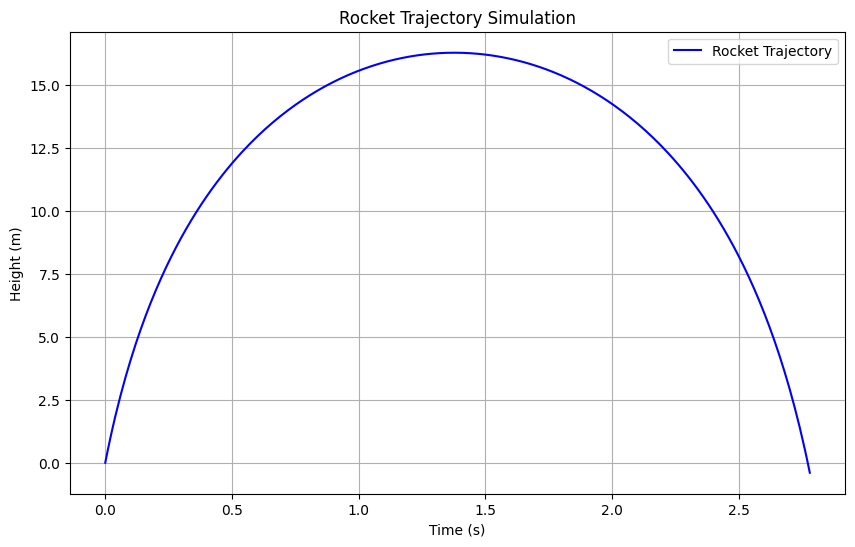

In [4]:
# Run the simulation
times, heights = simulate_trajectory(initial_velocity, drag_coefficient=drag_coefficient)

# Plot the results
plot_trajectory(times, heights)
